In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('loan_data.csv')
print("\n--- Memuat Dataset ---")
print("Dataset berhasil dimuat dari 'loan_data.csv'")


--- Memuat Dataset ---
Dataset berhasil dimuat dari 'loan_data.csv'


In [46]:
print("\n--- Struktur Dataset ---")
print("Dimensi Dataset (baris, kolom):", df.shape)
print("\nTipe Data Setiap Kolom:")
print(df.dtypes)
print("\nInformasi Dataset:")
print(df.info())
print("\nJumlah Nilai Unik per Kolom:")
print(df.nunique())


--- Struktur Dataset ---
Dimensi Dataset (baris, kolom): (45000, 14)

Tipe Data Setiap Kolom:
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null 

In [47]:
numeric_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
                'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
print("\n--- Statistik Deskriptif Kolom Numerik ---")
print(df[numeric_cols].describe())
print("\nSkewness Kolom Numerik:")
print(df[numeric_cols].skew())
print("\nKurtosis Kolom Numerik:")
print(df[numeric_cols].kurtosis())
print("\nPercentile Kolom Numerik (1%, 5%, 25%, 50%, 75%, 95%, 99%):")
print(df[numeric_cols].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))


--- Statistik Deskriptif Kolom Numerik ---
         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000          

In [48]:
print("\n--- Missing Values ---")
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())
print("\nPersentase Missing Values per Kolom:")
print(df.isnull().mean() * 100)


--- Missing Values ---
Jumlah Missing Values per Kolom:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Persentase Missing Values per Kolom:
person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     0.0
person_emp_exp                    0.0
person_home_ownership             0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_perso

In [49]:
print("\n--- Distribusi loan_status ---")
print("Jumlah per Kelas:")
print(df['loan_status'].value_counts())
print("\nProporsi per Kelas (%):")
print(df['loan_status'].value_counts(normalize=True) * 100)


--- Distribusi loan_status ---
Jumlah per Kelas:
loan_status
0    35000
1    10000
Name: count, dtype: int64

Proporsi per Kelas (%):
loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64



--- Visualisasi Distribusi Kolom Numerik ---


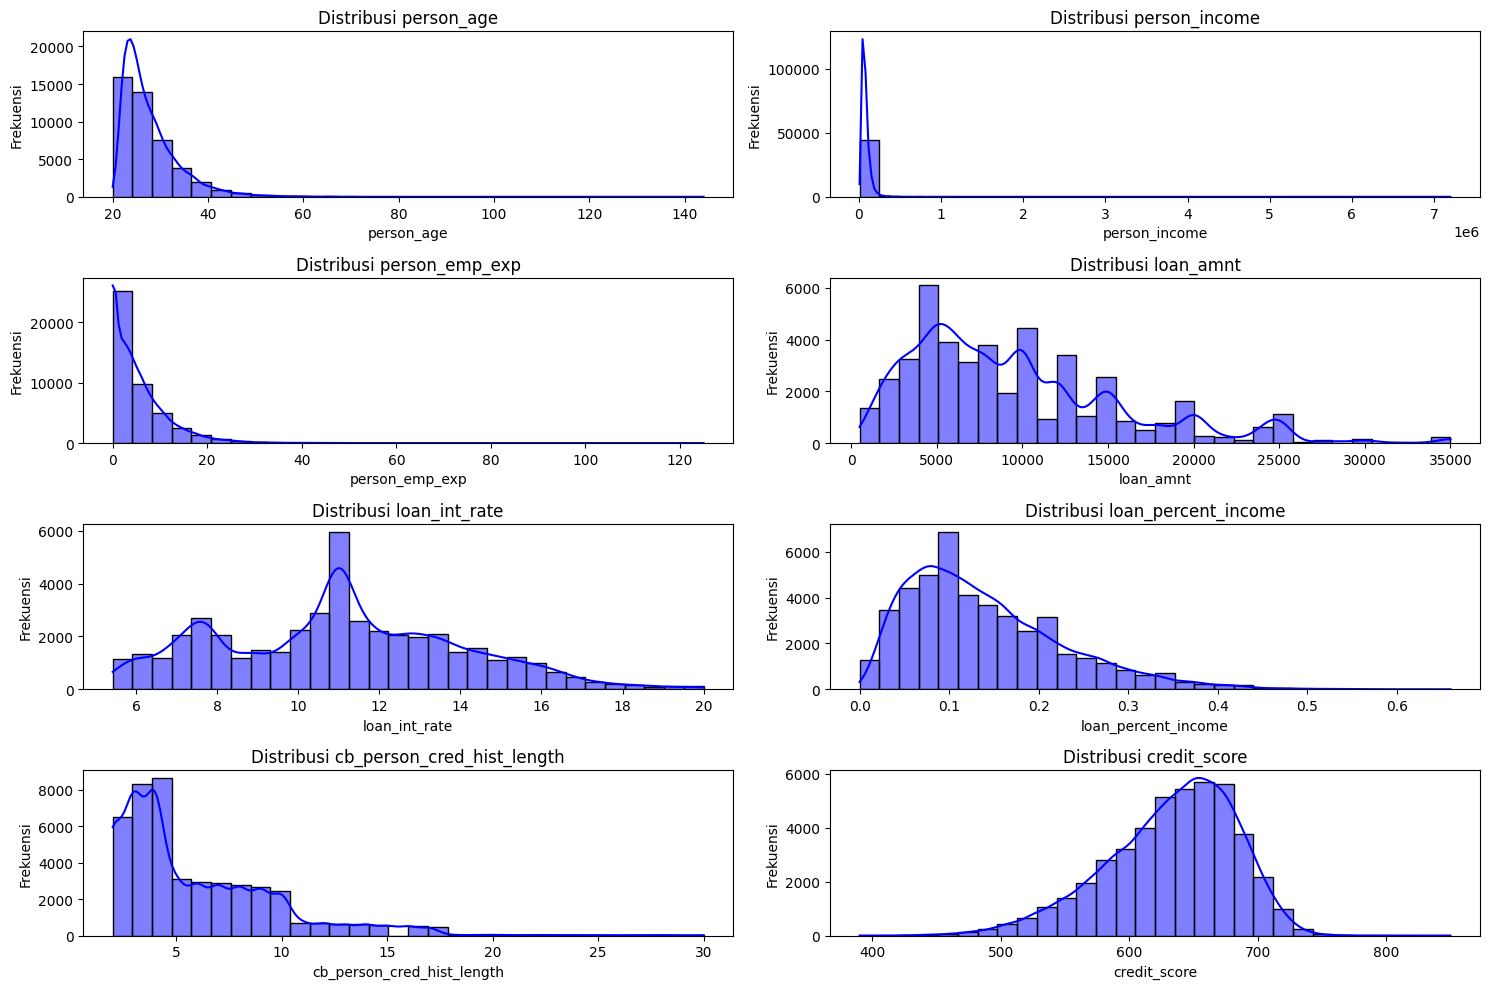

In [50]:
print("\n--- Visualisasi Distribusi Kolom Numerik ---")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frekuensi', fontsize=10)
plt.tight_layout()
plt.show()


--- Visualisasi Boxplot Kolom Numerik ---


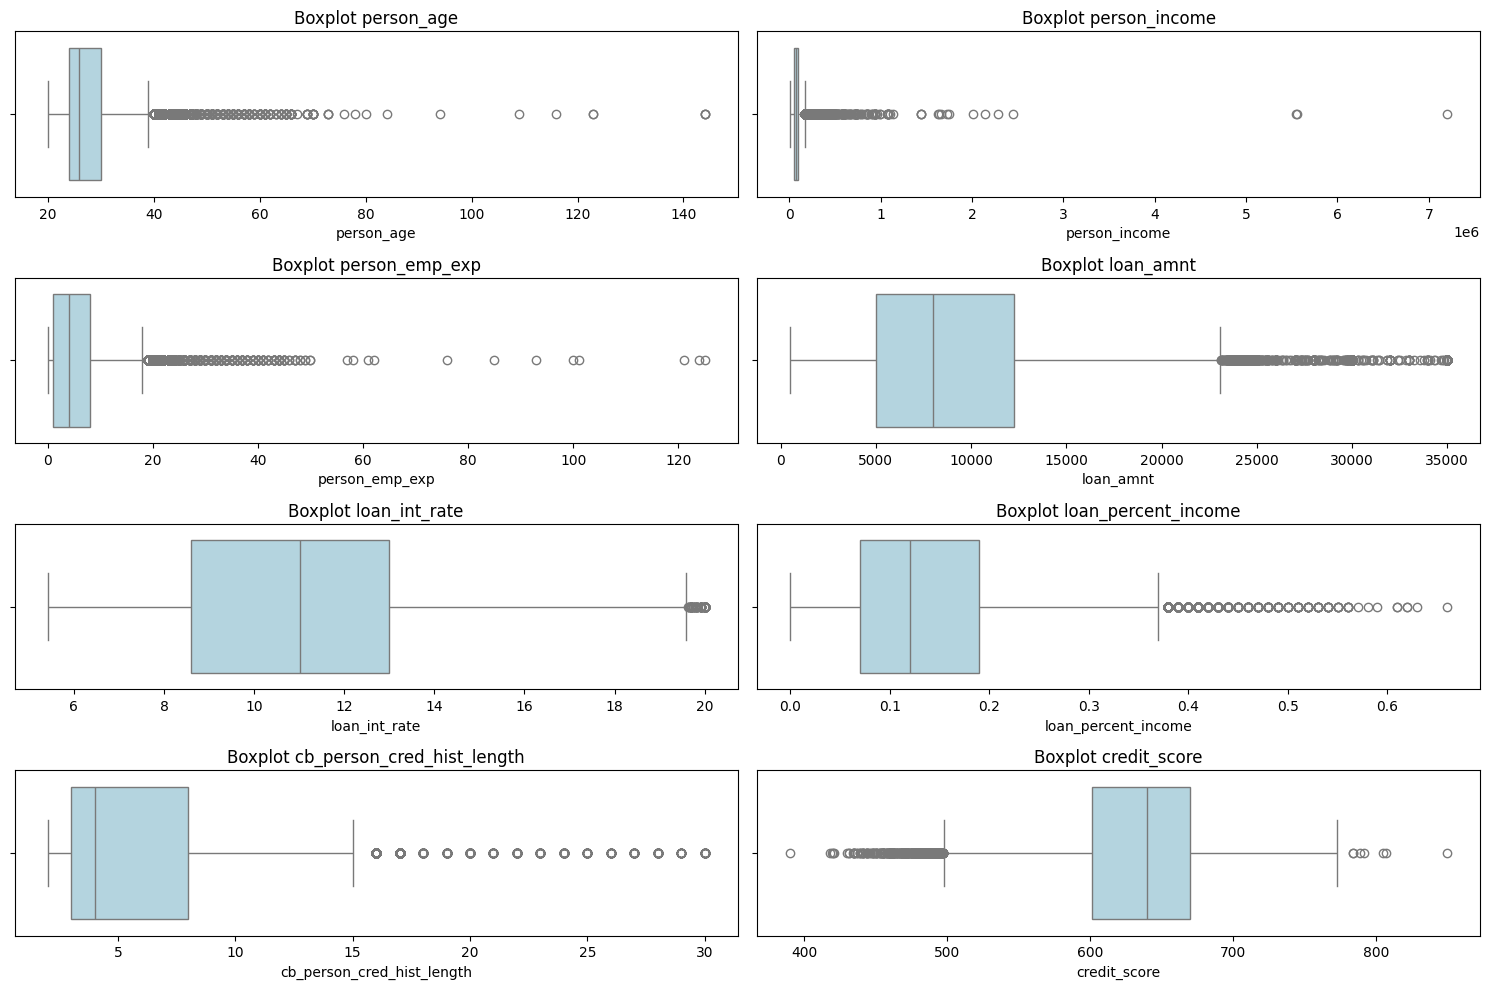

In [51]:
print("\n--- Visualisasi Boxplot Kolom Numerik ---")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
plt.tight_layout()
plt.show()


--- Korelasi Antar Kolom Numerik dan loan_status ---


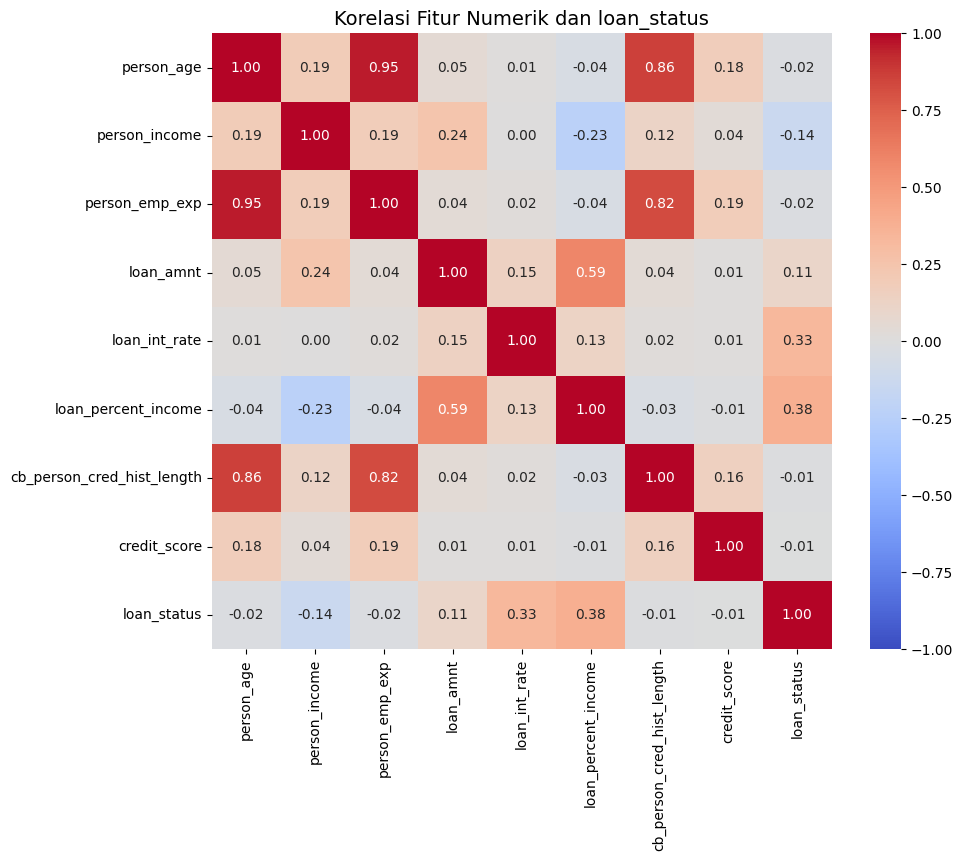

In [52]:
print("\n--- Korelasi Antar Kolom Numerik dan loan_status ---")
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols + ['loan_status']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Korelasi Fitur Numerik dan loan_status', fontsize=14)
plt.show()


--- Visualisasi Separabilitas Kelas ---


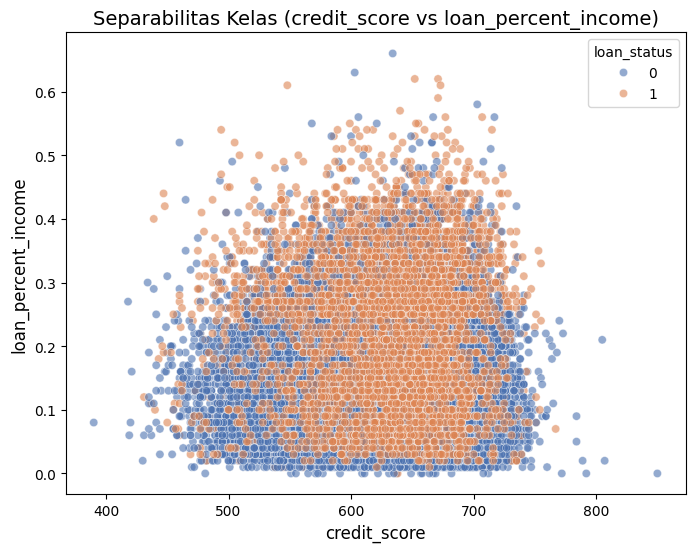

In [53]:
print("\n--- Visualisasi Separabilitas Kelas ---")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='credit_score', y='loan_percent_income', hue='loan_status', palette='deep', alpha=0.6)
plt.title('Separabilitas Kelas (credit_score vs loan_percent_income)', fontsize=14)
plt.xlabel('credit_score', fontsize=12)
plt.ylabel('loan_percent_income', fontsize=12)
plt.legend(title='loan_status')
plt.show()


--- Visualisasi Kolom Kategorikal ---


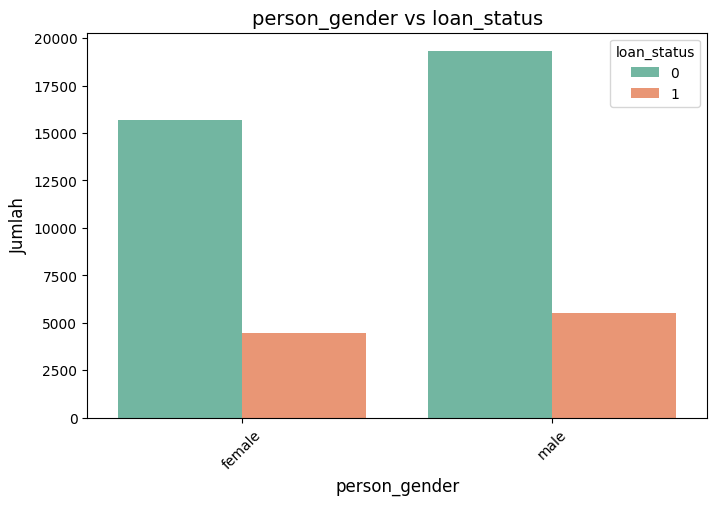

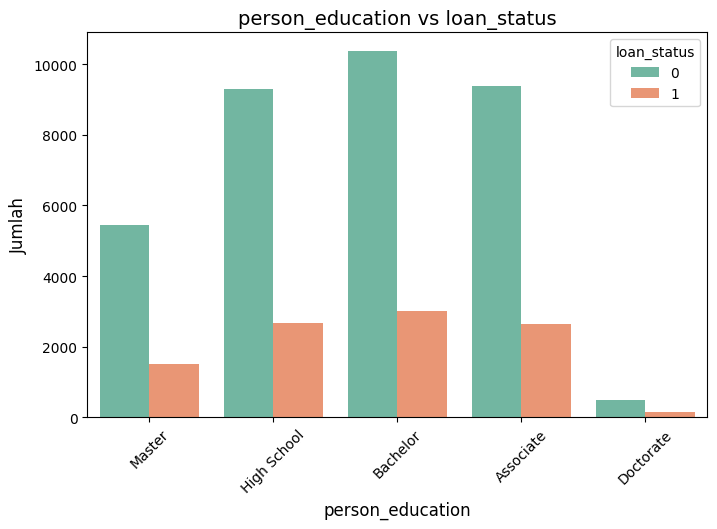

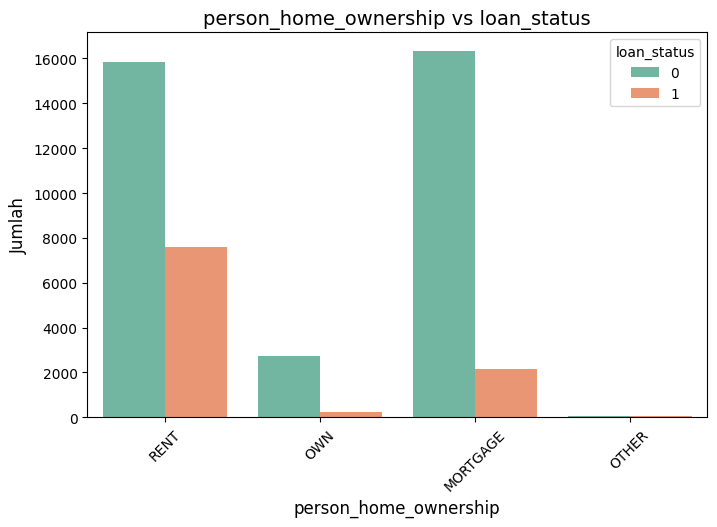

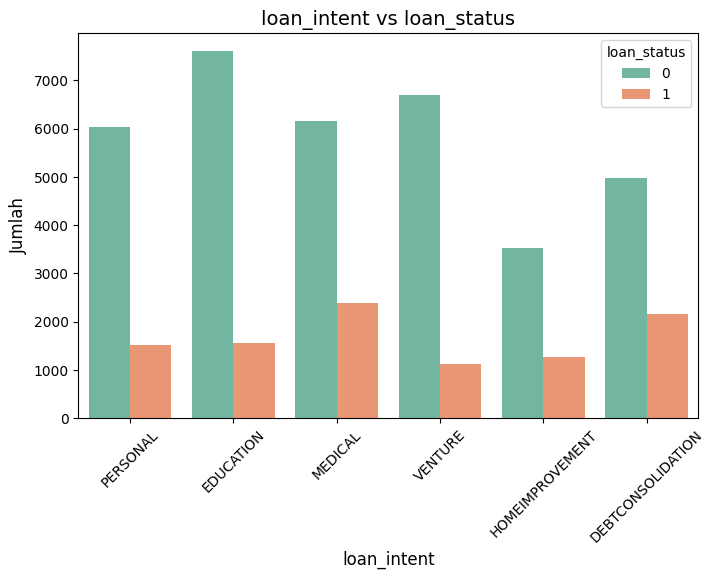

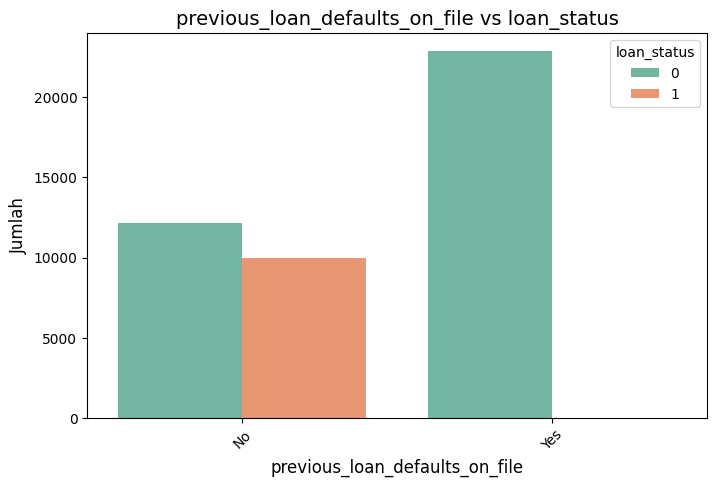

In [54]:
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
print("\n--- Visualisasi Kolom Kategorikal ---")
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='loan_status', palette='Set2')
    plt.title(f'{col} vs loan_status', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='loan_status')
    plt.show()

In [55]:
print("\n--- Missing Values Sebelum Imputasi ---")
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
print("\n--- Missing Values Sesudah Imputasi ---")
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())


--- Missing Values Sebelum Imputasi ---
Jumlah Missing Values per Kolom:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

--- Missing Values Sesudah Imputasi ---
Jumlah Missing Values per Kolom:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percen

In [56]:
print("\n--- Jumlah Baris Sebelum Menghapus Duplikasi ---")
print(f"Jumlah baris: {df.shape[0]}")
initial_rows = df.shape[0]
df = df.drop_duplicates()
print("\n--- Jumlah Baris Sesudah Menghapus Duplikasi ---")
print(f"Jumlah baris: {df.shape[0]}, Duplikasi dihapus: {initial_rows - df.shape[0]}")


--- Jumlah Baris Sebelum Menghapus Duplikasi ---
Jumlah baris: 45000

--- Jumlah Baris Sesudah Menghapus Duplikasi ---
Jumlah baris: 45000, Duplikasi dihapus: 0


In [57]:
print("\n--- Kolom Sebelum Encoding Kategorikal ---")
print("Daftar kolom:")
print(df.columns.tolist())
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\n--- Kolom Sesudah Encoding Kategorikal ---")
print("Daftar kolom:")
print(df_encoded.columns.tolist())


--- Kolom Sebelum Encoding Kategorikal ---
Daftar kolom:
['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']

--- Kolom Sesudah Encoding Kategorikal ---
Daftar kolom:
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status', 'person_gender_male', 'person_education_Bachelor', 'person_education_Doctorate', 'person_education_High School', 'person_education_Master', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes']


In [58]:
numeric_continuous_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
                          'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
print("\n--- Statistik Kolom Numerik Sebelum Feature Engineering ---")
print(df_encoded[numeric_continuous_cols].describe())
df_encoded['income_to_loan_ratio'] = df_encoded['person_income'] / (df_encoded['loan_amnt'] + 1e-5)
df_encoded['credit_to_income'] = df_encoded['credit_score'] / (df_encoded['person_income'] + 1e-5)
df_encoded['age_to_credit_length'] = df_encoded['person_age'] / (df_encoded['cb_person_cred_hist_length'] + 1e-5)
numeric_continuous_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
                          'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
                          'income_to_loan_ratio', 'credit_to_income', 'age_to_credit_length']
binary_cols = [col for col in df_encoded.columns if col not in numeric_continuous_cols + ['loan_status']]
print("\n--- Statistik Kolom Numerik Sesudah Feature Engineering ---")
print(df_encoded[numeric_continuous_cols].describe())


--- Statistik Kolom Numerik Sebelum Feature Engineering ---
         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0

In [59]:
skewed_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_percent_income', 'cb_person_cred_hist_length']
print("\n--- Skewness Sebelum Transformasi ---")
print("Skewness per kolom:")
print(df_encoded[skewed_cols].skew())
for col in skewed_cols:
    skewness = df_encoded[col].skew()
    if skewness > 1 or skewness < -1:
        print(f"\nTransformasi untuk {col}:")
        print(f"Skewness sebelum: {skewness:.2f}")
        df_encoded[col] = np.log1p(df_encoded[col].clip(lower=0))
        print(f"Skewness sesudah: {df_encoded[col].skew():.2f}")
print("\n--- Skewness Sesudah Transformasi ---")
print("Skewness per kolom:")
print(df_encoded[skewed_cols].skew())


--- Skewness Sebelum Transformasi ---
Skewness per kolom:
person_age                     2.548154
person_income                 34.137583
person_emp_exp                 2.594917
loan_amnt                      1.179731
loan_percent_income            1.034512
cb_person_cred_hist_length     1.631720
dtype: float64

Transformasi untuk person_age:
Skewness sebelum: 2.55
Skewness sesudah: 1.22

Transformasi untuk person_income:
Skewness sebelum: 34.14
Skewness sesudah: 0.22

Transformasi untuk person_emp_exp:
Skewness sebelum: 2.59
Skewness sesudah: -0.12

Transformasi untuk loan_amnt:
Skewness sebelum: 1.18
Skewness sesudah: -0.44

Transformasi untuk loan_percent_income:
Skewness sebelum: 1.03
Skewness sesudah: 0.83

Transformasi untuk cb_person_cred_hist_length:
Skewness sebelum: 1.63
Skewness sesudah: 0.44

--- Skewness Sesudah Transformasi ---
Skewness per kolom:
person_age                    1.220204
person_income                 0.224018
person_emp_exp               -0.122990
loan_amn

In [60]:
def isolation_score(X, n_trees=100, subsample_size=256):
    scores = np.zeros(len(X))
    X_values = X.values.astype('float64')
    for _ in range(n_trees):
        sample_idx = np.random.choice(len(X), min(subsample_size, len(X)), replace=False)
        X_sample = X_values[sample_idx]
        for i in range(len(X)):
            path_length = 0
            current_data = X_sample
            while len(current_data) > 1:
                feature = np.random.randint(X.shape[1])
                split_value = np.random.uniform(current_data[:, feature].min(), current_data[:, feature].max())
                if X_values[i, feature] < split_value:
                    current_data = current_data[current_data[:, feature] < split_value]
                else:
                    current_data = current_data[current_data[:, feature] >= split_value]
                path_length += 1
            scores[i] += path_length
    scores /= n_trees
    return 2 ** (-scores / np.log(subsample_size))

print("\n--- Jumlah Baris Sebelum Outlier Removal ---")
print(f"Jumlah baris: {df_encoded.shape[0]}")
outlier_scores = isolation_score(df_encoded[numeric_continuous_cols])
initial_rows = df_encoded.shape[0]
df_encoded = df_encoded[outlier_scores < np.percentile(outlier_scores, 90)]
print("\n--- Jumlah Baris Sesudah Outlier Removal ---")
print(f"Jumlah baris: {df_encoded.shape[0]}, Outlier dihapus: {initial_rows - df_encoded.shape[0]}")


--- Jumlah Baris Sebelum Outlier Removal ---
Jumlah baris: 45000

--- Jumlah Baris Sesudah Outlier Removal ---
Jumlah baris: 40465, Outlier dihapus: 4535


In [61]:
print("\n--- Statistik Kolom Numerik Sebelum Standarisasi ---")
print(df_encoded[numeric_continuous_cols].describe())
for col in numeric_continuous_cols:
    min_val, max_val = df_encoded[col].min(), df_encoded[col].max()
    if max_val != min_val:
        df_encoded[col] = (df_encoded[col] - min_val) / (max_val - min_val)
    else:
        df_encoded[col] = 0
        print(f"\n{col} memiliki variansi nol, diset ke 0")
print("\n--- Statistik Kolom Numerik Sesudah Standarisasi ---")
print(df_encoded[numeric_continuous_cols].describe())


--- Statistik Kolom Numerik Sebelum Standarisasi ---
         person_age  person_income  person_emp_exp     loan_amnt  \
count  40465.000000   40465.000000    40465.000000  40465.000000   
mean       3.326807      11.136981        1.391559      8.996673   
std        0.160480       0.481916        0.923701      0.635136   
min        3.044522       9.628261        0.000000      6.908755   
25%        3.218876      10.798085        0.693147      8.517393   
50%        3.295837      11.118474        1.609438      9.012011   
75%        3.433987      11.457307        2.079442      9.433564   
max        3.931826      13.188542        3.496508     10.463132   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   40465.000000         40465.000000                40465.000000   
mean       10.958492             0.128560                    1.768517   
std         2.906723             0.068697                    0.465877   
min         5.420000             0.009950

<ipython-input-61-b9ba4b342aed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded[col] = (df_encoded[col] - min_val) / (max_val - min_val)
<ipython-input-61-b9ba4b342aed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded[col] = (df_encoded[col] - min_val) / (max_val - min_val)


In [62]:
def smote_minority(df, target_col, n_samples, k=5):
    minority = df[df[target_col] == 1].copy()
    synthetic = []
    X_minority_numeric = minority[numeric_continuous_cols].values.astype('float64')  # Hanya numerik kontinu
    X_minority_numeric = np.nan_to_num(X_minority_numeric, nan=0.0)
    for _ in range(n_samples):
        idx = np.random.randint(0, len(minority))
        distances = np.sqrt(np.sum((X_minority_numeric - X_minority_numeric[idx]) ** 2, axis=1))
        nearest = np.argsort(distances)[1:k+1]
        nn_idx = nearest[np.random.randint(0, k)]
        # Interpolasi hanya pada kolom numerik kontinu
        synth_numeric = minority[numeric_continuous_cols].iloc[idx] + np.random.uniform(0, 0.5) * (
            minority[numeric_continuous_cols].iloc[nn_idx] - minority[numeric_continuous_cols].iloc[idx]
        )
        # Gunakan nilai biner dari tetangga terdekat tanpa interpolasi
        synth_binary = minority[binary_cols].iloc[nn_idx]
        # Gabungkan dengan target
        synth_point = pd.concat([synth_numeric, synth_binary, pd.Series({'loan_status': 1})])
        synthetic.append(synth_point)
    synthetic_df = pd.DataFrame(synthetic, columns=df.columns)
    return pd.concat([df, synthetic_df], ignore_index=True)

print("\n--- Distribusi Kelas Sebelum SMOTE ---")
print("Jumlah per kelas:")
print(df_encoded['loan_status'].value_counts())
minority_count = df_encoded['loan_status'].value_counts().get(1, 0)
majority_count = df_encoded['loan_status'].value_counts().get(0, 0)
if minority_count < majority_count:
    n_samples = int(0.75 * (majority_count - minority_count))
    df_encoded = smote_minority(df_encoded, 'loan_status', n_samples)
    print("\n--- Distribusi Kelas Sesudah SMOTE ---")
    print("Jumlah per kelas:")
    print(df_encoded['loan_status'].value_counts())
    print(f"SMOTE: Menambahkan {n_samples} sampel sintetis")
else:
    print("\nTidak ada ketidakseimbangan kelas yang signifikan, SMOTE tidak diterapkan.")


--- Distribusi Kelas Sebelum SMOTE ---
Jumlah per kelas:
loan_status
0    32223
1     8242
Name: count, dtype: int64

--- Distribusi Kelas Sesudah SMOTE ---
Jumlah per kelas:
loan_status
0.0    32223
1.0    26227
Name: count, dtype: int64
SMOTE: Menambahkan 17985 sampel sintetis


In [63]:
def stratified_split(df, target, train_frac=0.8):
    train = df.groupby(target, group_keys=False).apply(lambda x: x.sample(frac=train_frac, random_state=42))
    test = df.drop(train.index)
    return train, test

print("\n--- Jumlah Data Sebelum Train-Test Split ---")
print(f"Total baris: {df_encoded.shape[0]}")
train, test = stratified_split(df_encoded, 'loan_status')
X_train = train.drop('loan_status', axis=1)
y_train = train['loan_status']
X_test = test.drop('loan_status', axis=1)
y_test = test['loan_status']
print("\n--- Jumlah Data Sesudah Train-Test Split ---")
print(f"Train: {X_train.shape[0]} baris, {X_train.shape[1]} kolom")
print(f"Test: {X_test.shape[0]} baris, {X_test.shape[1]} kolom")


--- Jumlah Data Sebelum Train-Test Split ---
Total baris: 58450

--- Jumlah Data Sesudah Train-Test Split ---
Train: 46760 baris, 25 kolom
Test: 11690 baris, 25 kolom


<ipython-input-63-f9a2d23c0919>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train = df.groupby(target, group_keys=False).apply(lambda x: x.sample(frac=train_frac, random_state=42))


In [64]:
def knn_predict(X_train, y_train, X_test, k=5, distance='euclidean', weights='distance'):
    predictions = []
    X_train_values = X_train.values.astype('float64')
    y_train_values = y_train.values.astype('int64')
    print("\n--- Memulai Prediksi KNN ---")
    print(f"Jumlah data train: {X_train_values.shape[0]}, Jumlah data test: {X_test.shape[0]}")
    print(f"Parameter: k={k}, distance={distance}, weights={weights}")
    for i, test_point in enumerate(X_test.values.astype('float64')):
        if distance == 'euclidean':
            distances = np.sqrt(np.sum((X_train_values - test_point) ** 2, axis=1))
        elif distance == 'manhattan':
            distances = np.sum(np.abs(X_train_values - test_point), axis=1)
        else:
            raise ValueError("Metrik jarak tidak didukung. Gunakan 'euclidean' atau 'manhattan'.")
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train_values[nearest_indices]
        nearest_distances = distances[nearest_indices]
        if weights == 'distance':
            w = 1 / (nearest_distances + 1e-5)
            prediction = np.bincount(nearest_labels, weights=w).argmax()
        elif weights == 'gaussian':
            std = np.std(nearest_distances) + 1e-5
            w = np.exp(-nearest_distances ** 2 / (2 * std ** 2))
            prediction = np.bincount(nearest_labels, weights=w).argmax()
        elif weights == 'uniform':
            prediction = pd.Series(nearest_labels).mode()[0]
        else:
            raise ValueError("Metode pembobotan tidak didukung. Gunakan 'uniform', 'distance', atau 'gaussian'.")
        predictions.append(prediction)
        if i % 1000 == 0:
            print(f"Prediksi {i} dari {X_test.shape[0]} selesai.")
    print("\nPrediksi KNN selesai.")
    return np.array(predictions)

print("\n--- Prediksi Awal KNN ---")
pred = knn_predict(X_train, y_train, X_test, k=5, distance='euclidean', weights='distance')
print("Prediksi awal selesai, panjang prediksi:", len(pred))


--- Prediksi Awal KNN ---

--- Memulai Prediksi KNN ---
Jumlah data train: 46760, Jumlah data test: 11690
Parameter: k=5, distance=euclidean, weights=distance
Prediksi 0 dari 11690 selesai.
Prediksi 1000 dari 11690 selesai.
Prediksi 2000 dari 11690 selesai.
Prediksi 3000 dari 11690 selesai.
Prediksi 4000 dari 11690 selesai.
Prediksi 5000 dari 11690 selesai.
Prediksi 6000 dari 11690 selesai.
Prediksi 7000 dari 11690 selesai.
Prediksi 8000 dari 11690 selesai.
Prediksi 9000 dari 11690 selesai.
Prediksi 10000 dari 11690 selesai.
Prediksi 11000 dari 11690 selesai.

Prediksi KNN selesai.
Prediksi awal selesai, panjang prediksi: 11690



--- Confusion Matrix Awal ---
Confusion Matrix:
[[5562  883]
 [ 215 5030]]

--- Metrik Evaluasi Awal ---
Accuracy: 0.9061
Precision (kelas 0, kelas 1): 0.9628, 0.8507
Recall (kelas 0, kelas 1): 0.8630, 0.9590
F1-Score (kelas 0, kelas 1): 0.9102, 0.9016

--- Visualisasi Confusion Matrix Awal ---


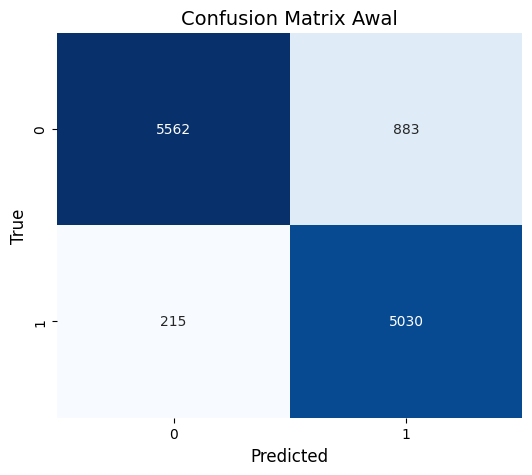


--- Hasil Cross-Validation ---

--- Memulai Cross-Validation ---
Jumlah split: 5

Fold 1 dari 5

--- Memulai Prediksi KNN ---
Jumlah data train: 46761, Jumlah data test: 11689
Parameter: k=5, distance=euclidean, weights=distance
Prediksi 0 dari 11689 selesai.
Prediksi 1000 dari 11689 selesai.
Prediksi 2000 dari 11689 selesai.
Prediksi 3000 dari 11689 selesai.
Prediksi 4000 dari 11689 selesai.
Prediksi 5000 dari 11689 selesai.
Prediksi 6000 dari 11689 selesai.
Prediksi 7000 dari 11689 selesai.
Prediksi 8000 dari 11689 selesai.
Prediksi 9000 dari 11689 selesai.
Prediksi 10000 dari 11689 selesai.
Prediksi 11000 dari 11689 selesai.

Prediksi KNN selesai.
Akurasi fold 1: 0.9063

Fold 2 dari 5

--- Memulai Prediksi KNN ---
Jumlah data train: 46761, Jumlah data test: 11689
Parameter: k=5, distance=euclidean, weights=distance
Prediksi 0 dari 11689 selesai.
Prediksi 1000 dari 11689 selesai.
Prediksi 2000 dari 11689 selesai.
Prediksi 3000 dari 11689 selesai.
Prediksi 4000 dari 11689 selesai.
Pr

In [65]:
def confusion_matrix(y_true, y_pred):
    unique_labels = np.unique(y_true)
    matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)
    for i, true in enumerate(unique_labels):
        for j, pred in enumerate(unique_labels):
            matrix[i, j] = np.sum((y_true == true) & (y_pred == pred))
    return matrix

print("\n--- Confusion Matrix Awal ---")
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

def classification_metrics(cm):
    precision = np.diag(cm) / cm.sum(axis=0)
    recall = np.diag(cm) / cm.sum(axis=1)
    f1 = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(cm)) / cm.sum()
    return {'precision': np.nan_to_num(precision), 'recall': np.nan_to_num(recall),
            'f1': np.nan_to_num(f1), 'accuracy': accuracy}

print("\n--- Metrik Evaluasi Awal ---")
metrics = classification_metrics(cm)
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Precision (kelas 0, kelas 1): {metrics['precision'][0]:.4f}, {metrics['precision'][1]:.4f}")
print(f"Recall (kelas 0, kelas 1): {metrics['recall'][0]:.4f}, {metrics['recall'][1]:.4f}")
print(f"F1-Score (kelas 0, kelas 1): {metrics['f1'][0]:.4f}, {metrics['f1'][1]:.4f}")

print("\n--- Visualisasi Confusion Matrix Awal ---")
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix Awal', fontsize=14)
plt.show()

def stratified_kfold_cv(df, target, n_splits=5, k=5, distance='euclidean', weights='distance'):
    folds = []
    print("\n--- Memulai Cross-Validation ---")
    print(f"Jumlah split: {n_splits}")

    # Membagi data secara manual untuk setiap kelas
    for label, group in df.groupby(target):
        group_shuffled = group.sample(frac=1, random_state=42).reset_index(drop=True)
        fold_size = len(group_shuffled) // n_splits
        for i in range(n_splits):
            start_idx = i * fold_size
            end_idx = (i + 1) * fold_size if i < n_splits - 1 else len(group_shuffled)
            folds.append(group_shuffled.iloc[start_idx:end_idx])

    scores = []
    for i in range(n_splits):
        print(f"\nFold {i+1} dari {n_splits}")
        test_fold = pd.concat([folds[j] for j in range(len(folds)) if j % n_splits == i])
        train_fold = pd.concat([folds[j] for j in range(len(folds)) if j % n_splits != i])
        pred = knn_predict(train_fold.drop(target, axis=1), train_fold[target], test_fold.drop(target, axis=1),
                          k=k, distance=distance, weights=weights)
        score = np.mean(pred == test_fold[target])
        scores.append(score)
        print(f"Akurasi fold {i+1}: {score:.4f}")

    mean_cv = np.mean(scores)
    std_cv = np.std(scores)
    print(f"\nCross-Validation selesai.")
    return mean_cv, std_cv

print("\n--- Hasil Cross-Validation ---")
mean_cv, std_cv = stratified_kfold_cv(df_encoded, 'loan_status', n_splits=5, k=5, distance='euclidean', weights='distance')
print(f"Mean Accuracy: {mean_cv:.4f}")
print(f"Standard Deviation: {std_cv:.4f}")


--- Memulai Tuning Hyperparameter ---
Kandidat k: [3, 5, 7, 9, 11, 15, 21]
Kandidat distance: ['euclidean', 'manhattan']
Kandidat weights: ['uniform', 'distance', 'gaussian']

Mencoba: k=3, distance=euclidean, weights=uniform

--- Memulai Prediksi KNN ---
Jumlah data train: 46760, Jumlah data test: 11690
Parameter: k=3, distance=euclidean, weights=uniform
Prediksi 0 dari 11690 selesai.
Prediksi 1000 dari 11690 selesai.
Prediksi 2000 dari 11690 selesai.
Prediksi 3000 dari 11690 selesai.
Prediksi 4000 dari 11690 selesai.
Prediksi 5000 dari 11690 selesai.
Prediksi 6000 dari 11690 selesai.
Prediksi 7000 dari 11690 selesai.
Prediksi 8000 dari 11690 selesai.
Prediksi 9000 dari 11690 selesai.
Prediksi 10000 dari 11690 selesai.
Prediksi 11000 dari 11690 selesai.

Prediksi KNN selesai.
Akurasi: 0.9007

Mencoba: k=3, distance=euclidean, weights=distance

--- Memulai Prediksi KNN ---
Jumlah data train: 46760, Jumlah data test: 11690
Parameter: k=3, distance=euclidean, weights=distance
Prediksi 0

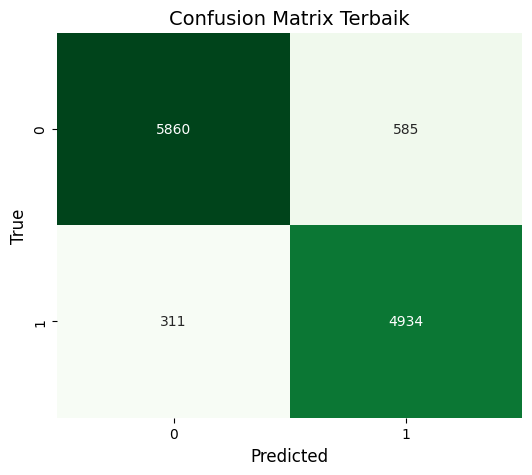

In [66]:
results = []
k_values = [3, 5, 7, 9, 11, 15, 21]
distances = ['euclidean', 'manhattan']
weights = ['uniform', 'distance', 'gaussian']
print("\n--- Memulai Tuning Hyperparameter ---")
print(f"Kandidat k: {k_values}")
print(f"Kandidat distance: {distances}")
print(f"Kandidat weights: {weights}")
for k in k_values:
    for dist in distances:
        for w in weights:
            print(f"\nMencoba: k={k}, distance={dist}, weights={w}")
            pred = knn_predict(X_train, y_train, X_test, k=k, distance=dist, weights=w)
            acc = np.mean(pred == y_test)
            results.append((k, dist, w, acc))
            print(f"Akurasi: {acc:.4f}")
best_params = max(results, key=lambda x: x[3])
print("\n--- Hasil Tuning Hyperparameter ---")
print(f"Parameter terbaik: k={best_params[0]}, distance={best_params[1]}, weights={best_params[2]}, Akurasi={best_params[3]:.4f}")

best_k, best_dist, best_weight, best_acc = best_params
print("\n--- Prediksi dengan Parameter Terbaik ---")
final_pred = knn_predict(X_train, y_train, X_test, k=best_k, distance=best_dist, weights=best_weight)
final_cm = confusion_matrix(y_test, final_pred)
print("\nConfusion Matrix Terbaik:")
print(final_cm)

final_metrics = classification_metrics(final_cm)
print("\n--- Metrik Evaluasi Terbaik ---")
print(f"Accuracy: {final_metrics['accuracy']:.4f}")
print(f"Precision (kelas 0, kelas 1): {final_metrics['precision'][0]:.4f}, {final_metrics['precision'][1]:.4f}")
print(f"Recall (kelas 0, kelas 1): {final_metrics['recall'][0]:.4f}, {final_metrics['recall'][1]:.4f}")
print(f"F1-Score (kelas 0, kelas 1): {final_metrics['f1'][0]:.4f}, {final_metrics['f1'][1]:.4f}")

print("\n--- Visualisasi Confusion Matrix Terbaik ---")
plt.figure(figsize=(6, 5))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix Terbaik', fontsize=14)
plt.show()


--- Prediksi Ensemble ---

--- Memulai Bagging KNN ---
Jumlah model: 10, k=3, distance=euclidean, weights=gaussian

Model 1 dari 10


<ipython-input-68-1e45331bdf31>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = df.groupby(target, group_keys=False).apply(lambda x: x.sample(frac=0.8, replace=True, random_state=np.random.randint(1000)))



--- Memulai Prediksi KNN ---
Jumlah data train: 46760, Jumlah data test: 11690
Parameter: k=3, distance=euclidean, weights=gaussian
Prediksi 0 dari 11690 selesai.
Prediksi 1000 dari 11690 selesai.
Prediksi 2000 dari 11690 selesai.
Prediksi 3000 dari 11690 selesai.
Prediksi 4000 dari 11690 selesai.
Prediksi 5000 dari 11690 selesai.
Prediksi 6000 dari 11690 selesai.
Prediksi 7000 dari 11690 selesai.
Prediksi 8000 dari 11690 selesai.
Prediksi 9000 dari 11690 selesai.
Prediksi 10000 dari 11690 selesai.
Prediksi 11000 dari 11690 selesai.

Prediksi KNN selesai.

Model 2 dari 10

--- Memulai Prediksi KNN ---
Jumlah data train: 46760, Jumlah data test: 11690
Parameter: k=3, distance=euclidean, weights=gaussian


<ipython-input-68-1e45331bdf31>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = df.groupby(target, group_keys=False).apply(lambda x: x.sample(frac=0.8, replace=True, random_state=np.random.randint(1000)))


Prediksi 0 dari 11690 selesai.
Prediksi 1000 dari 11690 selesai.
Prediksi 2000 dari 11690 selesai.
Prediksi 3000 dari 11690 selesai.
Prediksi 4000 dari 11690 selesai.
Prediksi 5000 dari 11690 selesai.
Prediksi 6000 dari 11690 selesai.
Prediksi 7000 dari 11690 selesai.
Prediksi 8000 dari 11690 selesai.
Prediksi 9000 dari 11690 selesai.
Prediksi 10000 dari 11690 selesai.
Prediksi 11000 dari 11690 selesai.

Prediksi KNN selesai.

Model 3 dari 10

--- Memulai Prediksi KNN ---
Jumlah data train: 46760, Jumlah data test: 11690
Parameter: k=3, distance=euclidean, weights=gaussian


<ipython-input-68-1e45331bdf31>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = df.groupby(target, group_keys=False).apply(lambda x: x.sample(frac=0.8, replace=True, random_state=np.random.randint(1000)))


Prediksi 0 dari 11690 selesai.
Prediksi 1000 dari 11690 selesai.
Prediksi 2000 dari 11690 selesai.
Prediksi 3000 dari 11690 selesai.
Prediksi 4000 dari 11690 selesai.
Prediksi 5000 dari 11690 selesai.
Prediksi 6000 dari 11690 selesai.
Prediksi 7000 dari 11690 selesai.
Prediksi 8000 dari 11690 selesai.
Prediksi 9000 dari 11690 selesai.
Prediksi 10000 dari 11690 selesai.
Prediksi 11000 dari 11690 selesai.

Prediksi KNN selesai.

Model 4 dari 10

--- Memulai Prediksi KNN ---
Jumlah data train: 46760, Jumlah data test: 11690
Parameter: k=3, distance=euclidean, weights=gaussian


<ipython-input-68-1e45331bdf31>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = df.groupby(target, group_keys=False).apply(lambda x: x.sample(frac=0.8, replace=True, random_state=np.random.randint(1000)))


Prediksi 0 dari 11690 selesai.
Prediksi 1000 dari 11690 selesai.
Prediksi 2000 dari 11690 selesai.
Prediksi 3000 dari 11690 selesai.
Prediksi 4000 dari 11690 selesai.
Prediksi 5000 dari 11690 selesai.
Prediksi 6000 dari 11690 selesai.
Prediksi 7000 dari 11690 selesai.
Prediksi 8000 dari 11690 selesai.
Prediksi 9000 dari 11690 selesai.
Prediksi 10000 dari 11690 selesai.
Prediksi 11000 dari 11690 selesai.

Prediksi KNN selesai.

Model 5 dari 10


<ipython-input-68-1e45331bdf31>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = df.groupby(target, group_keys=False).apply(lambda x: x.sample(frac=0.8, replace=True, random_state=np.random.randint(1000)))



--- Memulai Prediksi KNN ---
Jumlah data train: 46760, Jumlah data test: 11690
Parameter: k=3, distance=euclidean, weights=gaussian
Prediksi 0 dari 11690 selesai.
Prediksi 1000 dari 11690 selesai.
Prediksi 2000 dari 11690 selesai.
Prediksi 3000 dari 11690 selesai.
Prediksi 4000 dari 11690 selesai.
Prediksi 5000 dari 11690 selesai.
Prediksi 6000 dari 11690 selesai.
Prediksi 7000 dari 11690 selesai.
Prediksi 8000 dari 11690 selesai.
Prediksi 9000 dari 11690 selesai.
Prediksi 10000 dari 11690 selesai.
Prediksi 11000 dari 11690 selesai.

Prediksi KNN selesai.

Model 6 dari 10


<ipython-input-68-1e45331bdf31>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = df.groupby(target, group_keys=False).apply(lambda x: x.sample(frac=0.8, replace=True, random_state=np.random.randint(1000)))



--- Memulai Prediksi KNN ---
Jumlah data train: 46760, Jumlah data test: 11690
Parameter: k=3, distance=euclidean, weights=gaussian
Prediksi 0 dari 11690 selesai.
Prediksi 1000 dari 11690 selesai.
Prediksi 2000 dari 11690 selesai.
Prediksi 3000 dari 11690 selesai.
Prediksi 4000 dari 11690 selesai.
Prediksi 5000 dari 11690 selesai.
Prediksi 6000 dari 11690 selesai.
Prediksi 7000 dari 11690 selesai.
Prediksi 8000 dari 11690 selesai.
Prediksi 9000 dari 11690 selesai.
Prediksi 10000 dari 11690 selesai.
Prediksi 11000 dari 11690 selesai.

Prediksi KNN selesai.

Model 7 dari 10


<ipython-input-68-1e45331bdf31>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = df.groupby(target, group_keys=False).apply(lambda x: x.sample(frac=0.8, replace=True, random_state=np.random.randint(1000)))



--- Memulai Prediksi KNN ---
Jumlah data train: 46760, Jumlah data test: 11690
Parameter: k=3, distance=euclidean, weights=gaussian
Prediksi 0 dari 11690 selesai.
Prediksi 1000 dari 11690 selesai.
Prediksi 2000 dari 11690 selesai.
Prediksi 3000 dari 11690 selesai.
Prediksi 4000 dari 11690 selesai.
Prediksi 5000 dari 11690 selesai.
Prediksi 6000 dari 11690 selesai.
Prediksi 7000 dari 11690 selesai.
Prediksi 8000 dari 11690 selesai.
Prediksi 9000 dari 11690 selesai.
Prediksi 10000 dari 11690 selesai.
Prediksi 11000 dari 11690 selesai.

Prediksi KNN selesai.

Model 8 dari 10

--- Memulai Prediksi KNN ---
Jumlah data train: 46760, Jumlah data test: 11690
Parameter: k=3, distance=euclidean, weights=gaussian


<ipython-input-68-1e45331bdf31>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = df.groupby(target, group_keys=False).apply(lambda x: x.sample(frac=0.8, replace=True, random_state=np.random.randint(1000)))


Prediksi 0 dari 11690 selesai.
Prediksi 1000 dari 11690 selesai.
Prediksi 2000 dari 11690 selesai.
Prediksi 3000 dari 11690 selesai.
Prediksi 4000 dari 11690 selesai.
Prediksi 5000 dari 11690 selesai.
Prediksi 6000 dari 11690 selesai.
Prediksi 7000 dari 11690 selesai.
Prediksi 8000 dari 11690 selesai.
Prediksi 9000 dari 11690 selesai.
Prediksi 10000 dari 11690 selesai.
Prediksi 11000 dari 11690 selesai.

Prediksi KNN selesai.

Model 9 dari 10

--- Memulai Prediksi KNN ---
Jumlah data train: 46760, Jumlah data test: 11690
Parameter: k=3, distance=euclidean, weights=gaussian


<ipython-input-68-1e45331bdf31>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = df.groupby(target, group_keys=False).apply(lambda x: x.sample(frac=0.8, replace=True, random_state=np.random.randint(1000)))


Prediksi 0 dari 11690 selesai.
Prediksi 1000 dari 11690 selesai.
Prediksi 2000 dari 11690 selesai.
Prediksi 3000 dari 11690 selesai.
Prediksi 4000 dari 11690 selesai.
Prediksi 5000 dari 11690 selesai.
Prediksi 6000 dari 11690 selesai.
Prediksi 7000 dari 11690 selesai.
Prediksi 8000 dari 11690 selesai.
Prediksi 9000 dari 11690 selesai.
Prediksi 10000 dari 11690 selesai.
Prediksi 11000 dari 11690 selesai.

Prediksi KNN selesai.

Model 10 dari 10

--- Memulai Prediksi KNN ---
Jumlah data train: 46760, Jumlah data test: 11690
Parameter: k=3, distance=euclidean, weights=gaussian


<ipython-input-68-1e45331bdf31>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = df.groupby(target, group_keys=False).apply(lambda x: x.sample(frac=0.8, replace=True, random_state=np.random.randint(1000)))


Prediksi 0 dari 11690 selesai.
Prediksi 1000 dari 11690 selesai.
Prediksi 2000 dari 11690 selesai.
Prediksi 3000 dari 11690 selesai.
Prediksi 4000 dari 11690 selesai.
Prediksi 5000 dari 11690 selesai.
Prediksi 6000 dari 11690 selesai.
Prediksi 7000 dari 11690 selesai.
Prediksi 8000 dari 11690 selesai.
Prediksi 9000 dari 11690 selesai.
Prediksi 10000 dari 11690 selesai.
Prediksi 11000 dari 11690 selesai.

Prediksi KNN selesai.

Bagging KNN selesai.

Confusion Matrix Ensemble:
[[6405   40]
 [  71 5174]]

--- Metrik Evaluasi Ensemble ---
Accuracy: 0.9905
Precision (kelas 0, kelas 1): 0.9890, 0.9923
Recall (kelas 0, kelas 1): 0.9938, 0.9865
F1-Score (kelas 0, kelas 1): 0.9914, 0.9894

--- Visualisasi Confusion Matrix Ensemble ---


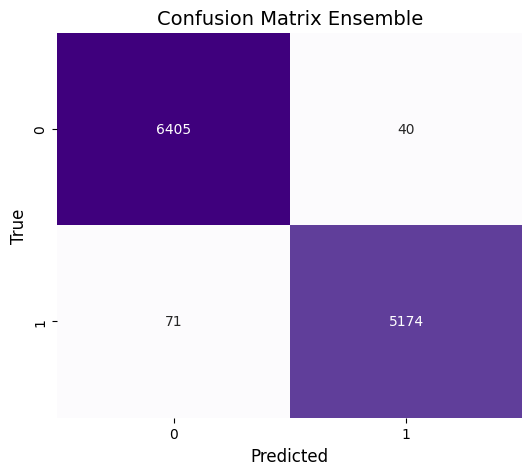

In [68]:
# Ensemble
def bagging_knn(df, target, n_models=10, k=best_k, distance=best_dist, weights=best_weight):
    predictions = []
    print("\n--- Memulai Bagging KNN ---")
    print(f"Jumlah model: {n_models}, k={k}, distance={distance}, weights={weights}")
    for i in range(n_models):
        print(f"\nModel {i+1} dari {n_models}")
        sample = df.groupby(target, group_keys=False).apply(lambda x: x.sample(frac=0.8, replace=True, random_state=np.random.randint(1000)))
        pred = knn_predict(sample.drop(target, axis=1), sample[target], X_test, k=k, distance=distance, weights=weights)
        predictions.append(pred)
    ensemble_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=np.array(predictions))
    print("\nBagging KNN selesai.")
    return ensemble_pred

print("\n--- Prediksi Ensemble ---")
ensemble_pred = bagging_knn(df_encoded, 'loan_status', n_models=10, k=best_k, distance=best_dist, weights=best_weight)
ensemble_cm = confusion_matrix(y_test, ensemble_pred)
print("\nConfusion Matrix Ensemble:")
print(ensemble_cm)

# Metrik ensemble
ensemble_metrics = classification_metrics(ensemble_cm)
print("\n--- Metrik Evaluasi Ensemble ---")
print(f"Accuracy: {ensemble_metrics['accuracy']:.4f}")
print(f"Precision (kelas 0, kelas 1): {ensemble_metrics['precision'][0]:.4f}, {ensemble_metrics['precision'][1]:.4f}")
print(f"Recall (kelas 0, kelas 1): {ensemble_metrics['recall'][0]:.4f}, {ensemble_metrics['recall'][1]:.4f}")
print(f"F1-Score (kelas 0, kelas 1): {ensemble_metrics['f1'][0]:.4f}, {ensemble_metrics['f1'][1]:.4f}")

# Visualisasi Confusion Matrix ensemble
print("\n--- Visualisasi Confusion Matrix Ensemble ---")
plt.figure(figsize=(6, 5))
sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix Ensemble', fontsize=14)
plt.show()